# Modelo de Precidição de Valores das Casas
##### Feito por Giulliano Veiga - Whatsapp: 8598170-8027

### Importando Bibliotecas

In [80]:
# pandas para leitura de arquivos CSV
import pandas as pd
# matplotlib para visualização de dados
import matplotlib.pyplot as plt
# scikit-learn para dividir os dados em conjuntos de treinamento e teste
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [81]:
# importando dataset senso_california
senso_california = pd.read_csv("senso_california.csv")
# exibindo as primeiras linhas do dataframe

senso_california.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [82]:
# o .info() exibe informações gerais do dataframe, como número de linhas, colunas, tipos de dados e uso de memória.
senso_california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
# Exibindo as linhas onde a coluna 'total_bedrooms' possui valores em branco,
# foram identificadas 207 linhas com valores ausentes.
senso_california[senso_california['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [84]:
# a coluna 'ocean_proximity' é do tipo 'object', ou seja, contém dados categóricos.
# Para verificar os valores únicos e suas contagens, podemos usar o método value_counts().
senso_california.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

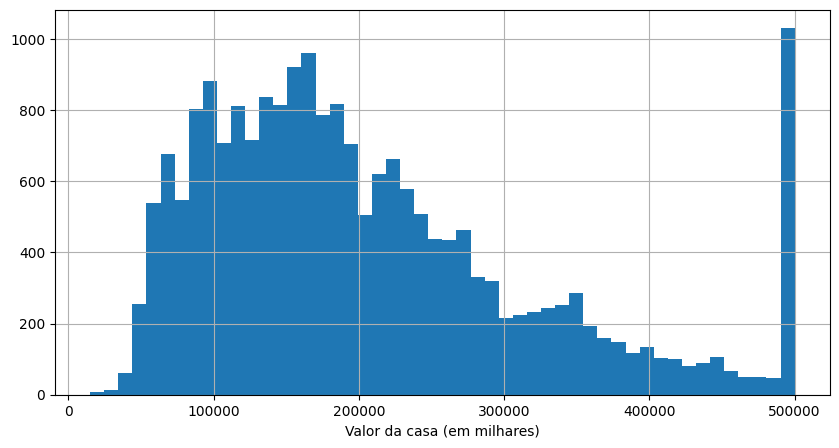

In [85]:
# essa leitura do histograma mostra a distribuição dos valores das casas, 
# permitindo identificar a presença de outliers e a forma da distribuição.
senso_california.median_house_value.hist(bins=50, figsize=(10,5))
plt.xlabel('Valor da casa (em milhares)');


### Dividir os dados em conjuntos de treinamento e de teste

In [86]:
from sklearn.model_selection import train_test_split
### Dividir os dados em conjuntos de treinamento e de teste
senso_california_train, senso_california_test = train_test_split(senso_california, test_size=0.2, random_state=42)

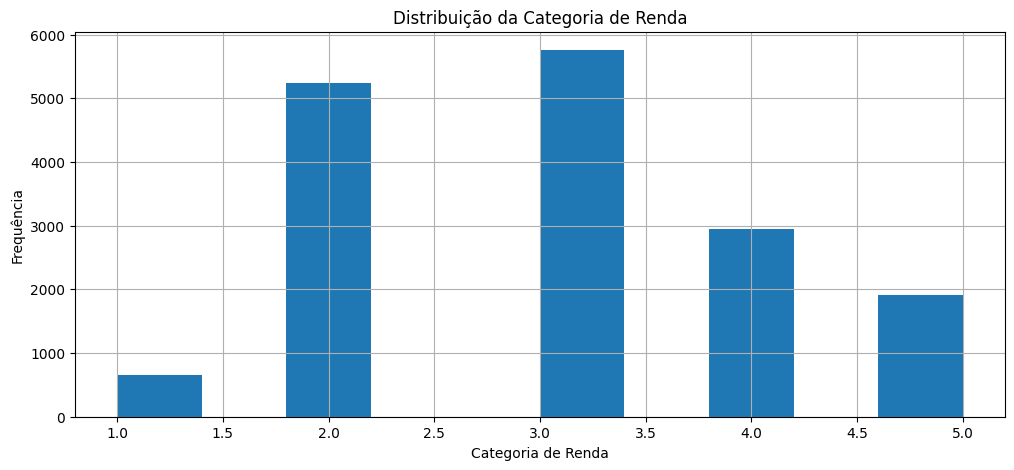

In [87]:
import numpy as np
senso_california_train['income_cat'] = pd.cut(senso_california_train['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
senso_california_train['income_cat'].hist(figsize=(12,5))
plt.title('Distribuição da Categoria de Renda');
plt.ylabel('Frequência');
plt.xlabel('Categoria de Renda');

### Amostragem Estratificada em Conjunto de Dados

In [88]:
# Importa o StratifiedShuffleSplit para realizar a amostragem estratificada
from sklearn.model_selection import StratifiedShuffleSplit

# Cria o objeto de divisão estratificada, com 1 divisão e 20% dos dados para teste
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Para cada divisão gerada (apenas uma neste caso)
for train_index, test_index in split.split(senso_california, senso_california["income_cat"]):
    # Seleciona as amostras de treino e teste mantendo a proporção das categorias de renda
    strat_train_set = senso_california.loc[train_index]
    strat_test_set = senso_california.loc[test_index]

# Exibe a proporção de cada categoria de renda no conjunto de teste
print(strat_test_set['income_cat'].value_counts() / len(strat_test_set))

KeyError: 'income_cat'